In [0]:
from __future__ import absolute_import, unicode_literals, print_function
from google.colab import drive, files
drive.mount("/content/drive")
import os
os.chdir("/content/drive/My Drive/plant")
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Apple_Black_rot		   Grape_black_rot	  Tomato_Leaf_Mold
Apple_healthy		   Grape_Esca		  Tomato_mosaic_virus
Apple_rust		   Grape_healthy	  Tomato_septoria_leaf_spot
Apple_scab		   Grape_leaf_blight	  Tomato_spider_mites
Corn_healthy		   Tomato_Bacterial_spot  Tomato_Target_Spot
Corn_leaf_spot		   Tomato_early_blight	  Tomato_Yellow_Leaf_Curl_Virus
Corn_Northern_Leaf_Blight  Tomato_healthy
Corn_rust		   Tomato_late_blight


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import LabelBinarizer 
import numpy as np 
import mahotas 
import cv2 
import os 
import h5py 

In [0]:
# fixed-sizes for image 
fixed_size = tuple((500, 500))

In [0]:
# no.of.trees for Random Forests 
num_trees = 100 

In [0]:
# bins for histogram 
bins = 8 

In [0]:
# train_test_split size 
test_size = 0.10 

In [0]:
# seed for reproducing same results 
seed = 9

In [0]:
# feature-descriptor-1: Hu Moments 
def fd_hu_moments(image):     
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)     
  feature = cv2.HuMoments(cv2.moments(image)).flatten()     
  return feature

In [0]:
# feature-descriptor-2: Haralick Texture 
def fd_haralick(image):     
  # convert the image to grayscale     
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)     
  # compute the haralick texture feature vector     
  haralick = mahotas.features.haralick(gray).mean(axis=0)     
  # return the result     
  return haralick

In [0]:
# feature-descriptor-3: Color Histogram 
def fd_histogram(image, mask=None):     
  # convert the image to HSV color-space     
  image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)     
  # compute the color histogram     
  hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256]) 
  # normalize the histogram     
  cv2.normalize(hist, hist)     
  # return the histogram     
  return hist.flatten() 

In [0]:
# path to training data 
train_path = "/content/drive/My Drive/plant" 
# get the training labels 
train_labels = os.listdir(train_path) 
# sort the training labels 
train_labels.sort() 
print(train_labels) 
# empty lists to hold feature vectors and labels 
global_features = [] 
labels = [] 
i, j = 0, 0 
k = 0 
# num of images per class 
images_per_class = 104 

['Apple_Black_rot', 'Apple_healthy', 'Apple_rust', 'Apple_scab', 'Corn_Northern_Leaf_Blight', 'Corn_healthy', 'Corn_leaf_spot', 'Corn_rust', 'Grape_Esca', 'Grape_black_rot', 'Grape_healthy', 'Grape_leaf_blight', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Tomato_Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_early_blight', 'Tomato_healthy', 'Tomato_late_blight', 'Tomato_mosaic_virus', 'Tomato_septoria_leaf_spot', 'Tomato_spider_mites']


In [0]:
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
    for x in os.listdir(dir):

        # read the image and resize it to a fixed-size
        image = cv2.imread(os.path.join(dir, x))
        image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

ERROR! Session/line number was not unique in database. History logging moved to new session 61
[STATUS] processed folder: Apple_Black_rot
[STATUS] processed folder: Apple_healthy
[STATUS] processed folder: Apple_rust
[STATUS] processed folder: Apple_scab
[STATUS] processed folder: Corn_Northern_Leaf_Blight
[STATUS] processed folder: Corn_healthy
[STATUS] processed folder: Corn_leaf_spot
[STATUS] processed folder: Corn_rust
[STATUS] processed folder: Grape_Esca
[STATUS] processed folder: Grape_black_rot
[STATUS] processed folder: Grape_healthy
[STATUS] processed folder: Grape_leaf_blight
[STATUS] processed folder: Tomato_Bacterial_spot
[STATUS] processed folder: Tomato_Leaf_Mold
[STATUS] processed folder: Tomato_Target_Spot
[STATUS] processed folder: Tomato_Yellow_Leaf_Curl_Virus
[STATUS] processed folder: Tomato_early_blight
[STATUS] processed folder: Tomato_healthy
[STATUS] processed folder: Tomato_late_blight
[STATUS] processed folder: Tomato_mosaic_virus
[STATUS] processed folder: T

In [0]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))
# save the feature vector using HDF5
h5f_data = h5py.File('/content/drive/My Drive/Hdata.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('/content/drive/My Drive/Hlabels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

[STATUS] feature vector size (2288, 532)
[STATUS] training Labels (2288,)
[STATUS] training labels encoded...
[STATUS] feature vector normalized...
[STATUS] target labels: [ 0  0  0 ... 21 21 21]
[STATUS] target labels shape: (2288,)
[STATUS] end of training..


In [0]:
import numpy as np 
import os 
import glob 
import cv2 
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import KFold, StratifiedKFold 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.externals import joblib

In [0]:
models = [] 
models.append(('LR', LogisticRegression(random_state=9))) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier(random_state=9))) 
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=9))) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC(random_state=9))) 
# variables to hold the results and names 
results = [] 
names = [] 
scoring = "accuracy" 
# import the feature vector and trained labels 
h5f_data = h5py.File('/content/drive/My Drive/Hdata.h5', 'r') 
h5f_label = h5py.File('/content/drive/My Drive/Hlabels.h5', 'r') 
global_features_string = h5f_data['dataset_1'] 
global_labels_string = h5f_label['dataset_1'] 
global_features = np.array(global_features_string) 
global_labels = np.array(global_labels_string) 
h5f_data.close() 
h5f_label.close() 
# verify the shape of the feature vector and labels 
print("[STATUS] features shape: {}".format(global_features.shape)) 
print("[STATUS] labels shape: {}".format(global_labels.shape)) 
print("[STATUS] training started...") 

[STATUS] features shape: (2288, 532)
[STATUS] labels shape: (2288,)
[STATUS] training started...


In [0]:
# split the training and testing data 
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),np.array(global_labels),test_size=test_size,random_state=seed) 
print("[STATUS] splitted train and test data...") 
print("Train data  : {}".format(trainDataGlobal.shape)) 
print("Test data   : {}".format(testDataGlobal.shape)) 
print("Train labels: {}".format(trainLabelsGlobal.shape)) 
print("Test labels : {}".format(testLabelsGlobal.shape)) 

[STATUS] splitted train and test data...
Train data  : (2059, 532)
Test data   : (229, 532)
Train labels: (2059,)
Test labels : (229,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.776105 (0.025452)
LDA: 0.747923 (0.032845)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.761544 (0.033391)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.629413 (0.016431)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.879550 (0.019773)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.670751 (0.041295)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.785345 (0.032041)


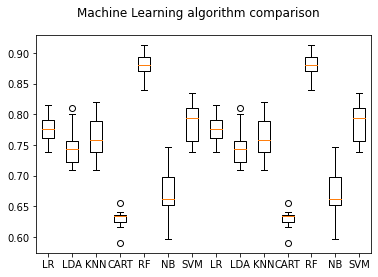

In [0]:
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 69


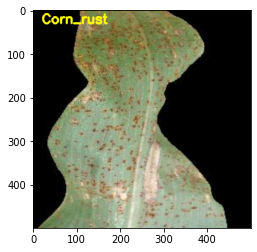

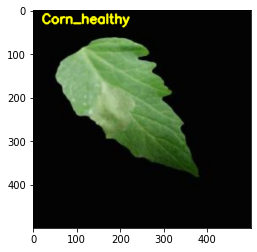

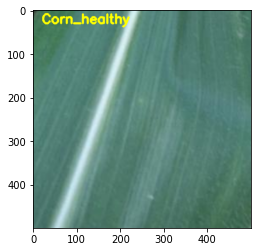

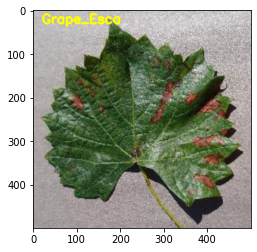

In [0]:
import matplotlib.pyplot as plt 
# create the model - Random Forests 
clf  = RandomForestClassifier(n_estimators=100, random_state=9) 
# fit the training data to the model 
clf.fit(trainDataGlobal, trainLabelsGlobal) 
# path to test data 
test_path = "/content/drive/My Drive/p" 
# loop through the test images 
for x in os.listdir(test_path):     
  # read the image     
  image = cv2.imread(os.path.join(test_path, x))     
  # resize the image     
  image = cv2.resize(image, fixed_size)     
  ####################################     
  # Global Feature extraction     
  ####################################     
  fv_hu_moments = fd_hu_moments(image)     
  fv_haralick   = fd_haralick(image)     
  fv_histogram  = fd_histogram(image)    
  ###################################     
   # Concatenate global features     
  ###################################     
  global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])     
  # predict label of test image     
  prediction = clf.predict(global_feature.reshape(1,-1))[0]     
  # show predicted label on image 
  cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)     
  # display the output image     
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))     
  plt.show()